# Exploratory Data Analysis of Ironman Zurich

In this script we will visually explore the ironman dataset. First we load the data and the necessary libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# load data
ironman = np.loadtxt("ironman.txt") # times are given in minutes

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

Then we preprocess the data and identifying the columns and define list to plot the following relationships:

* the total rank versus the total time,
* the age of the participant versus the total time,
* the running time versus the swimming time,
* the swimming time versus the total time,
* the cycling time versus the total time,
* the running time versus the total time

In [22]:
# preprocess: modifying 2nd column to correctly represent age
ironman[:,1] = abs(ironman[:,1] - 2010)

# dictionary with columnindex as key
column_dict = {0: 'total rank [rank]' ,
               1: 'age [year]',
               2: 'total time [min]',
               3: 'swimming time [min]',
               4: 'swimming rank [min]',
               5: 'cycling time [min]',
               6: 'cycling rank [rank]',
               7: 'running time [min]',
               8: 'running rank [rank]'}

# combinations to plot
combos = [[0,2], [1,2], [7,3], [3,2], [5,2], [7,2]]

Now we plot scatter:

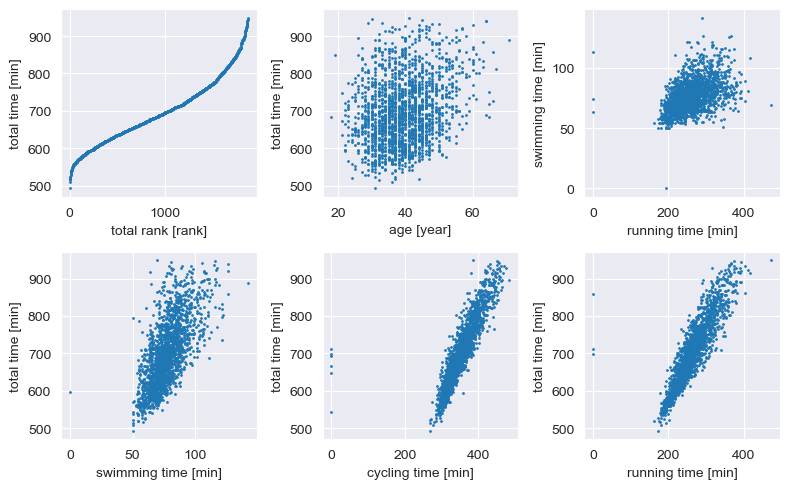

In [23]:
def scatter(lyst, ax): # multiple dimensioanl array
    # plot
    ax.scatter(ironman[:,lyst[0]], ironman[:,lyst[1]], s = 1)
    # labs
    ax.set_xlabel(column_dict[lyst[0]])
    ax.set_ylabel(column_dict[lyst[1]])
    # title = ("{a} vs. {b}").format(a = column_dict[lyst[0]],
    #                                   b = column_dict[lyst[1]])
    # ax.set_title(title)

# plot
fig, axs = plt.subplots(2, 3, figsize = (8, 5))
axs = np.ravel(axs) # flatten for loop
# all scatters
for i, combo in enumerate(combos):
    scatter(lyst = combo,
            ax = axs[i])
plt.tight_layout()

We see that scatter has less of an overview of how points are distributed. We may use hexbin plots:

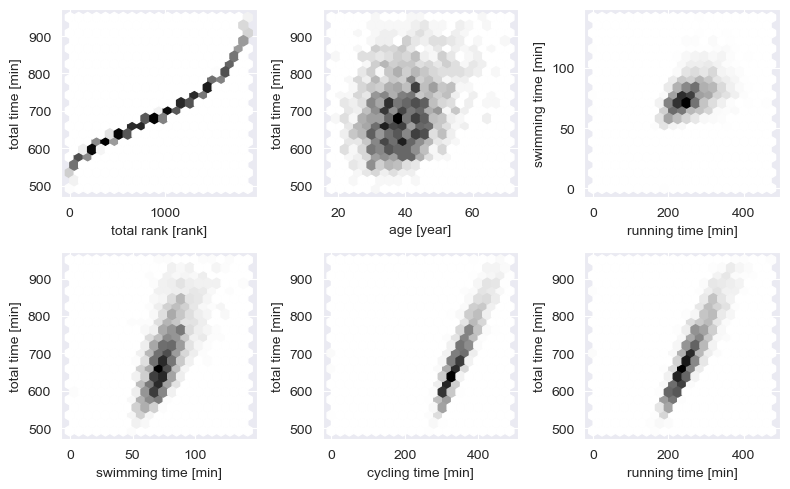

In [24]:
def hexbin(lyst, ax): # multiple dimensioanl array
    # plot
    ax.hexbin(ironman[:,lyst[0]], ironman[:,lyst[1]],
              cmap = "binary", gridsize = 20)
    # labs
    ax.set_xlabel(column_dict[lyst[0]])
    ax.set_ylabel(column_dict[lyst[1]])
    # title = ("{a} vs. {b}").format(a = column_dict[lyst[0]],
    #                                   b = column_dict[lyst[1]])
    # ax.set_title(title)

# plot
fig, axs = plt.subplots(2, 3, figsize = (8, 5))
axs = np.ravel(axs) # flatten for loop
# all hexbins
for i, combo in enumerate(combos):
    hexbin(lyst = combo,
            ax = axs[i])

plt.tight_layout()

Finally, we create a histogram of the distribtion of:
* the total time
* the age of the participants

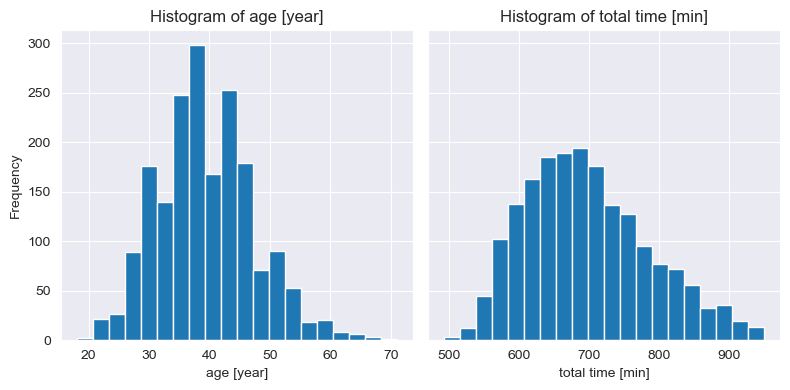

In [27]:
# implementing hist func, taking min/max of array as bounds/range
def histogram(key, bins, ax):
    # bounds
    lower = min(ironman[:,key])
    upper = max(ironman[:,key])
    # plot
    ax.hist(ironman[:, key], bins = bins, range = (lower, upper))
    ax.set_xlabel(column_dict[key])
    ax.set_title(("Histogram of {}").format(column_dict[key]))

# plot
fig, axs = plt.subplots(1, 2, figsize = (8, 4), sharey=True)
axs = np.ravel(axs) # flatten for loop
bins = 20

for i in [1, 2]:
   histogram(key = i, 
             bins = bins,
             ax = axs[i-1])

axs[0].set_ylabel("Frequency")

plt.tight_layout()